<h1><center>Visualization and Detection of credit card fraud transactions</center></h1>

## About the Project

    In this project we will we analysis the data and then we will build a deep neural network, with as many layers as we want. 
    The network can be applied to supervised learning problem with binary classification.

## Team members

In [37]:
from teammembers import *
owner()

                                               -----------------------
                                                 FINAL YEAR PROJECT
                                               -----------------------

                        -------------------------------------------------------------------
                         Title:Visualization and Detection of credit card fraud transactions
                        -------------------------------------------------------------------
                        |------------------------------------------------------------------|
                        |                              MEMBERS                             |
                        |------------------------------------------------------------------|
                        |        NAME       |   ROLL NUMBER   |   UNIVERSITY ROLL NUMBER   |
                        |------------------------------------------------------------------|
                        |   SOURAV MONDAL   |  

## 1 - Packages

Let's first import all the packages that we will need during this assignment. 
- [numpy](https://www.numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a library to plot graphs in Python.
- [seaborn](http://seaborn.pydata.org) is a library to plot advanced graphs in Python.
- [time] is a library to calculate the running times of a block.
- [panda](http://www.pandas.pydata.org) is a common package to interact with a dataset that is stored on an csv file.
- DNN provides the functions implemented in the "Building our Deep Neural Network: Step by Step".
- np.random.seed(1) is used to keep all the random function calls consistent.

In [9]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from DNN import *

## 2 - Dataset

    The dataset, hosted on Kaggle, includes credit card transactions made in September 2013 by European cardholders. 
    The data contains 284,807 transactions that occurred over a two-day period, of which 492 (0.17%) are fraudulent. Each transaction has 30 features, all of which are numerical. The features V1, V2, ..., V28 are the result of a PCA transformation. 
    To protect confidentiality, background information on these features is not available. The Time feature contains the time elapsed since the first transaction, and the Amount feature contains the transaction amount. The response variable, Class , is 1 in the case of fraud,and 0 otherwise.

    I was able to accurately identify fraudulent transactions using a Deep neural network. 
    I also calculated mutual information values to identify the variables most correlated with fraud and feeded those variable as input in our deep neural network model.

In [10]:
#Impoting Data Set
dataset=pd.read_csv('cc_fraud.csv')

## 3.1 Data Analysis

In [11]:
#Checking for missing data, if present then replace that cell with mean,median,most frequently used data for that column
dataset.isnull().any().any()

False

In [12]:
#Checking DataSet Size
dataset.shape

(284807, 31)

In [13]:
#Checking types of variable used
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [14]:
#Checking number of fraud transactions(i.e.,1) occured and valid transactions(i.e.,0) occured
dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

#### So from here it is clear that total 492 transactions are fraud

In [15]:
#View Dataset
print("Dataset:",dataset)

Dataset:             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ...

In [18]:
#Spliting off a test data set. First split the data into features and response variable
X = dataset.drop(labels='Class', axis=1) # Features
#del dataset                        # Delete the original data
#Viewing the Splited Feature set
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [19]:
# Making Response Set
Y = dataset.loc[:,'Class']               
#Viewing Responce set 
Y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [21]:
#Spliting into Training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
#Viewing splited Training set
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
68806,53150.0,-1.115047,1.035583,0.800712,-1.060398,0.032621,0.853422,-0.614243,-3.231161,1.539948,...,-0.644896,3.020385,-0.539618,0.033156,-0.774946,0.105868,-0.430853,0.229737,-0.070591,12.95
40018,40060.0,1.228473,-0.138826,0.473795,-0.166381,-0.453564,-0.190135,-0.355309,0.048598,0.128943,...,0.032481,-0.172147,-0.574730,0.036834,-0.303782,0.073315,0.810356,-0.069178,0.001890,25.57
250360,154865.0,1.926148,-0.198628,-0.286727,1.596852,-0.488963,-0.311405,-0.303207,0.035513,1.301312,...,-0.355216,-0.528432,-1.251300,0.455607,-0.120530,-0.361515,-1.099295,0.052747,-0.032622,6.90
234820,148130.0,2.046232,0.196183,-1.704650,0.530027,0.177496,-1.443091,0.255403,-0.365759,0.602945,...,-0.216247,0.201104,0.757245,-0.013600,-0.079318,0.234805,-0.098151,0.000028,-0.031675,4.55
10001,15014.0,-0.837077,1.034710,2.333129,3.103776,0.229143,0.501123,0.314283,-0.161583,0.409634,...,-0.134542,-0.363839,-0.458101,0.164097,0.234167,-0.418734,-0.074078,-0.355165,-0.169616,3.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211543,138459.0,-1.321976,1.138686,-0.940861,0.154160,0.109802,-0.538822,0.490058,0.513762,-0.493834,...,-0.436962,-0.012778,-0.237503,0.008713,-0.767844,-0.397162,0.316379,-0.463125,-0.010589,49.89
86293,61167.0,-0.627810,0.918729,1.478453,0.213171,0.933695,1.261486,0.504752,0.404286,-0.939740,...,0.088281,-0.051356,-0.004245,0.090535,-0.964599,-0.522294,0.296733,0.145939,0.110400,24.99
122579,76616.0,1.512602,-0.949435,-0.219062,-1.638850,-0.856348,-0.465996,-0.669193,-0.135566,-2.284345,...,-0.279028,-0.558803,-1.377240,0.080444,-0.579511,0.297851,-0.495367,-0.001415,0.003665,34.90
152315,97253.0,1.798863,-1.699791,-0.142182,-0.619533,-1.570248,0.083268,-1.501980,0.176287,1.755507,...,0.146098,0.181914,0.351358,0.115638,-0.566188,-0.596200,-0.295152,-0.033616,-0.032471,171.31


### Exploratory Data Analysis

C:\Users\shubh\Anaconda3\lib\site-packages\pandas\core\indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


Text(0.5, 1.0, 'Transaction Times')

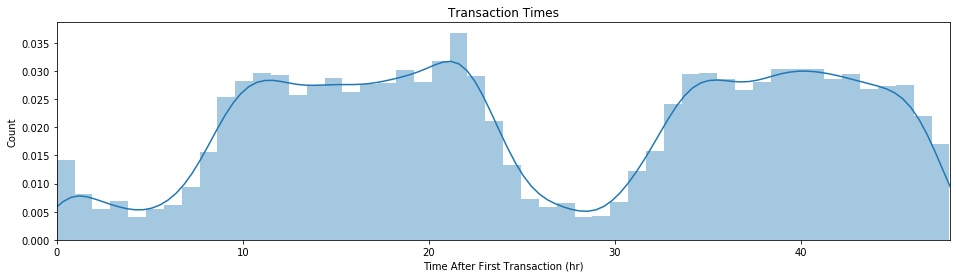

In [22]:
#Converting the time (seconds to hours) to ease the interpretation

X_train.loc[:,'Time'] = X_train.Time / 3600       #Converting into hrs
X_test.loc[:,'Time'] = X_test.Time / 3600

#Now Plot a histogram of transaction times, with one bin per hour:

plt.figure(figsize=(16,4))
sns.distplot(X_train['Time'])
plt.xlim([0,48])
plt.xlabel('Time After First Transaction (hr)')
plt.ylabel('Count')
plt.title('Transaction Times')

### It looks like there are two lulls in credit card transactions during night time on each day.

Text(0.5, 1.0, 'Transaction Amounts')

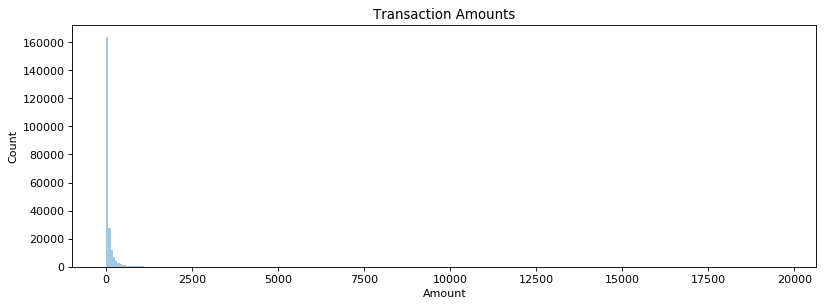

In [23]:
#Now Plotting Amount Graph
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['Amount'], bins=300, kde=False)
plt.ylabel('Count')
plt.title('Transaction Amounts')

###  The histogram is hard to read due to some outliers we can't see.

Text(0.5, 1.0, 'Transaction Amounts')

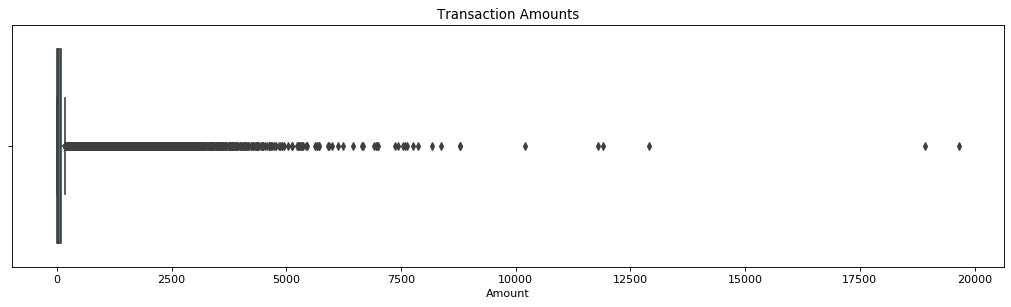

In [24]:
#So Ploting A boxplot which will show the outliers:
plt.figure(figsize=(16,4), dpi=80)
sns.boxplot(X_train['Amount'])
plt.title('Transaction Amounts')

### From graph it is clear that  amounts is certainly seem right-skewed

In [25]:
print("Mutual Information between Fraud and the Predictors")
#Mutual information is a non-parametric method to estimate the mutual dependence between two variables.
#Mutual information of 0 indicates no dependence.
#Higher values indicate higher dependence.
#Source:sklearn User Guide

from sklearn.feature_selection import mutual_info_classif as mic
dependent_info=pd.Series(data=mic(X_train, y_train,random_state=0), index=X_train.columns)
dependent_info.sort_values(ascending=False)

Mutual Information between Fraud and the Predictors


V17       0.008192
V14       0.007960
V12       0.007549
V10       0.007354
V11       0.006835
V16       0.006145
V4        0.004939
V3        0.004886
V18       0.004292
V9        0.004201
V7        0.003855
V2        0.003243
V21       0.002561
V5        0.002481
V27       0.002386
V6        0.002358
V1        0.002234
V8        0.002009
Time      0.002007
V28       0.001805
V19       0.001477
Amount    0.001399
V20       0.001274
V23       0.000816
V24       0.000725
V25       0.000631
V26       0.000546
V13       0.000486
V22       0.000473
V15       0.000337
dtype: float64

### The five most correlated variables with Class are, in decreasing order, V17, V14, V12, V10, and V11

## 3.2 Model Building

In [26]:
#Fetching only top 5 correlated variables
col_list = ["V17","V14","V12","V10","V11"]
X_obs = pd.DataFrame(dataset, columns = col_list)
X_obs = X_obs.iloc[:(284807)]
Y= pd.DataFrame(dataset, columns = ["Class"])
Y = Y.iloc[:(284807)]
print(X_obs)
print(Y)

             V17       V14       V12       V10       V11
0       0.207971 -0.311169 -0.617801  0.090794 -0.551600
1      -0.114805 -0.143772  1.065235 -0.166974  1.612727
2       1.109969 -0.165946  0.066084  0.207643  0.624501
3      -0.684093 -0.287924  0.178228 -0.054952 -0.226487
4      -0.237033 -1.119670  0.538196  0.753074 -0.822843
...          ...       ...       ...       ...       ...
284802  1.991691  4.626942  2.711941  4.356170 -1.593105
284803 -0.025693 -0.675143  0.915802 -0.975926 -0.150189
284804  0.313502 -0.510602  0.063119 -0.484782  0.411614
284805  0.509928  0.449624 -0.962886 -0.399126 -1.933849
284806 -0.660377 -0.084316 -0.031513 -0.915427 -1.040458

[284807 rows x 5 columns]
        Class
0           0
1           0
2           0
3           0
4           0
...       ...
284802      0
284803      0
284804      0
284805      0
284806      0

[284807 rows x 1 columns]


In [27]:
X_obs=X_obs.to_numpy()
Y=Y.to_numpy()

In [28]:
print(X_obs)
print(X_obs.shape)
print(Y)
print(Y.shape)

[[ 0.20797124 -0.31116935 -0.61780086  0.09079417 -0.55159953]
 [-0.11480466 -0.1437723   1.06523531 -0.16697441  1.61272666]
 [ 1.10996938 -0.16594592  0.06608369  0.20764287  0.62450146]
 ...
 [ 0.31350179 -0.51060184  0.06311886 -0.48478176  0.41161374]
 [ 0.50992846  0.44962444 -0.96288614 -0.39912565 -1.93384881]
 [-0.66037665 -0.08431647 -0.03151305 -0.91542665 -1.04045834]]
(284807, 5)
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
(284807, 1)


In [29]:
#Spliting into Training and test set
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X_obs, Y, test_size=0.2, random_state=0)

In [30]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(227845, 5)
(56962, 5)
(227845, 1)
(56962, 1)


In [31]:
nn_architecture = [
    {"layer_size": 5, "activation": "none"}, # input layer
    {"layer_size": 5, "activation": "relu"},
    {"layer_size": 4, "activation": "relu"},
    {"layer_size": 3, "activation": "relu"},
    {"layer_size": 1, "activation": "sigmoid"}
]

In [32]:
def predict(X, y, parameters):    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters,nn_architecture)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)*100) + " %")
        
    return p

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.537506
Cost after iteration 200: 0.429369
Cost after iteration 300: 0.352490
Cost after iteration 400: 0.296298
Cost after iteration 500: 0.254076
Cost after iteration 600: 0.221532
Cost after iteration 700: 0.195871
Cost after iteration 800: 0.175228
Cost after iteration 900: 0.158330
Cost after iteration 1000: 0.144284
Cost after iteration 1100: 0.132451
Cost after iteration 1200: 0.122364
Cost after iteration 1300: 0.113676
Cost after iteration 1400: 0.106122
Cost after iteration 1500: 0.099501
Cost after iteration 1600: 0.093652
Cost after iteration 1700: 0.088453
Cost after iteration 1800: 0.083802
Cost after iteration 1900: 0.079619
Cost after iteration 2000: 0.075837
Cost after iteration 2100: 0.072403
Cost after iteration 2200: 0.069272
Cost after iteration 2300: 0.066405
Cost after iteration 2400: 0.063772
Cost after iteration 2500: 0.061344


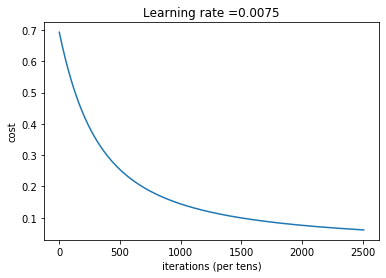

In [38]:
parameters = L_layer_model(train_x.T,train_y.T,nn_architecture,num_iterations=2510,print_cost=True)

In [39]:
pred_train = predict(train_x.T, train_y.T, parameters)

Accuracy: 99.82839210867036 %


In [40]:
pred_test = predict(test_x.T, test_y.T, parameters)

Accuracy: 99.8226888100839 %


## Further improvements
    We can face the “overfitting” problem if the training dataset is not big enough. It means that the learned network doesn’t generalize to new examples that it has never seen. We can use regularization methods such as L2 regularization (it consists of appropriately modifying our cost function) or dropout ( it randomly shuts down some neurons in each iteration).

    We used Gradient Descent to update the parameters and minimize the cost. You can learn more advanced optimization methods that can speed up learning and even get you to a better final value for the cost function for example:

    Mini-batch gradient descent
    Momentum
    Adam optimizer